## Facebook Data Manipulation using logarithmic scale and histogram

For this part we will carry out some rudimentary social network analysis.  To start let's understand how we can represent (some aspects of) a social network in Python.  Dictionaries are a good tool for this.  Let's look at the example below.


In [71]:
example_network = {'Alice': ['Bob', 'Cheryl', 'Daniel'], 
                   'Bob': ['Alice', 'Daniel'], 
                   'Cheryl': ['Alice'], 
                   'Daniel': ['Alice', 'Bob']}

Here in example_network there are 4 users - Alice, Bob, Cheryl, and Daniel - which are the keys in our dictionary.  The values corresponding to each key is a list of their friends (other users/keys in the dictionary).  Here we think of the network as being *undirected* - if x is a friend of y, then y must also be a friend of x.  This represents social networks like Facebook where friendship is reciprocal.  Other networks where you "follow" users (but that does not entail the other users "follow" you would be represented by a *directed* network.  We can visualize the above network as follows:
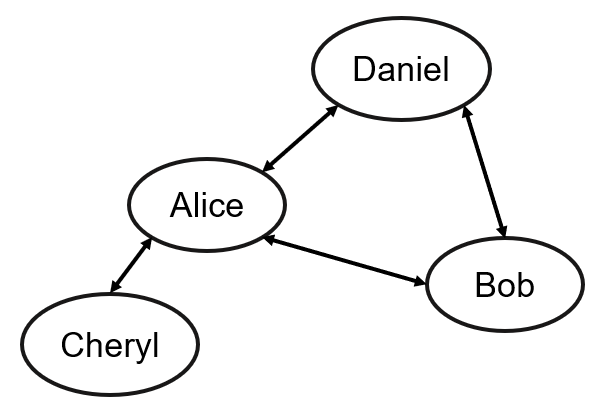

Real world networks often display interesting characteristics that are different from many popular models for network generation.  In particular, we will explore the distribution of *degrees*, that is the number of friends of each user in the network.  The following code will load in a real world network derived from a social networking site (courtesy of the Stanford Network Analysis Project).  The users/nodes in the network represent pages and corresponding pages are connected/friends with each other if they link to each other.  Run the code below to load the network into a dictionary as in the example.  Note how many web pages are in the network and how many connections there are.

In [72]:
def load_network(filename):
    # Initialize the dictionary
    network = {}
    with open(filename) as network_file:
        # The first line of the file is a header, which we can skip
        header = network_file.readline()
        # counter variable for number of connections
        num_connections = 0
        for line in network_file:
            # Each line is of the form "id1,id2"
            # We can get each id by splitting along the comma
            values = line.split(',') 
            u = values[0]
            v = values[1]
            if u not in network:
                network[u] = [v]
            else:
                network[u].append(v)
            if v not in network:
                network[v] = [u]
            else:
                network[v].append(u)
                
            # Update num_connections
            num_connections += 1
    return network, num_connections

network, num_connections = load_network('network_edges.csv')

print("Number of users/pages = ", len(network.keys()))
print("Number of connections = ", num_connections)

Number of users/pages =  36999
Number of connections =  171002


**Compute the Degree Distribution**

The degree of a user in a network is its number of friends.  Let's write a function to aggregate this information.

- Write a function called compute_degrees which takes in a network as a parameter/argument.  
    - You may assume that network is a dictionary formatted as example_network above (but potentially larger and with different keys).  Error handling is not necessary.
    - The output of the function should either be a dictionary or a numpy array containing the degree of each user in the input network.
        - If you use a dictionary, then each user is a key and its corresponding value is its degree.
    - For the input example_network above we should have the following output:
        - If using a dictionary: {'Alice': 3, 'Bob':2, 'Cheryl':1, 'Daniel':2}
        - If using a numpy array: array([3, 2, 1, 2]) (although for our purposes the order doesn't matter)
        - You can use example_network to check your code

In [73]:
# Write the function compute_degrees
def compute_degrees(network):
    my_dict={}
    for values in network:
        my_dict[values]=len(network[values])
    return my_dict


In [74]:
print(compute_degrees(example_network))

{'Alice': 3, 'Bob': 2, 'Cheryl': 1, 'Daniel': 2}


**Visualize using a Histogram**

- Apply the function you wrote from the previous part to get the degree distribution of the network we loaded above.
- Create a histogram (with proper axis labels) of the degree distribution.
    - Set the number of bins to 15
- Now create a new dictionary/numpy array which instead stores the logarithm of the degree distribution and create a histogram for this.  Use the same settings as before.  Remember to properly label the axes.
    - Feel free to use base 2, base e, or base 10 for the logarithm
- Do you have any insights about the degree distribution versus when we took the logarithm?  Discuss these.

In [75]:
# Apply the function to get the degree distribution
dict_network=compute_degrees(network)


Text(0, 0.5, 'Frequency')

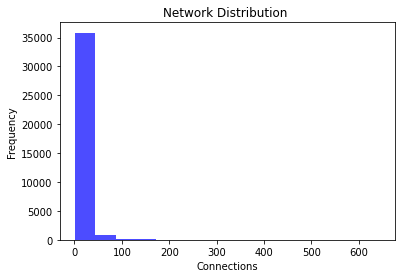

In [79]:
# Create a histogram of the degree distribution
x=dict_network.keys()
y=dict_network.values()
# Create a histogram
plt.hist(y, bins=15, color='b', alpha=0.7)

# Set the title and labels
plt.title("Network Distribution ")
plt.xlabel("Connections")
plt.ylabel("Frequency")


[Text(0.5, 0, 'Degree of Users'), Text(0, 0.5, 'Frequency')]

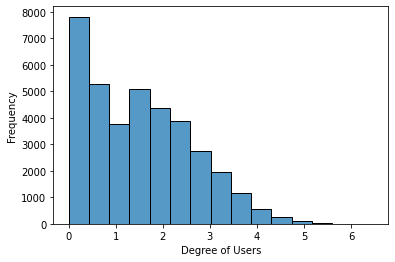

In [90]:
# Take the logarithm of the degree distribution and create a histogram for this
log_y = [np.log(i) for i in y]
fig = sns.histplot(log_y, bins = 15 )
fig.set(xlabel = 'Degree of Users', ylabel = 'Frequency')

In [ ]:
# Discuss your insights
#Comparing the above data and both the histograms, taking the logarithm of a normal distribution is useful, as in this case
#we are dealing with variables that span a wide range of values. 

#From the above histogram we can see the curve id skewed to the right meaning there are more people with fewer number of connections (degree)
#and as the degree increases the frequency goes down 

#Overall, taking the logarithm of a normally distributed variable can be a useful tool for data analysis 
#and can help to make the data more manageable and easier to work with,
#particularly when dealing with variables that span a wide range of values.
